In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./cleaned_data.csv')

In [3]:
df.head()

,Unnamed: 0,date,price,address,bedrooms,bathrooms,parking,area,median_price,population,average_age,zipcode,state
0,0,29 04 24,480000,"1307/60 A'beckett Street, Melbourne",2,1,0,53.0,5501000,47279,0,3000,Victoria
1,1,27 03 24,815000,"1103/108 Flinders Street, Melbourne",2,2,1,93.0,5501000,47279,0,3000,Victoria
2,2,29 02 24,3350000,"3801/35 Spring Street, Melbourne",3,2,2,175.0,10721000000,47279,0,3000,Victoria
3,3,29 02 24,3350000,"3801/35 Spring Street, Melbourne",3,2,2,175.0,10721000000,47279,0,3000,Victoria
4,4,8 12 23,590000,"508/181 Exhibition Street, Melbourne",2,1,1,80.0,5501000,47279,0,3000,Victoria


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54851 entries, 0 to 54850
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    54851 non-null  int64  
 1   date          54851 non-null  object 
 2   price         54851 non-null  int64  
 3   address       54851 non-null  object 
 4   bedrooms      54851 non-null  int64  
 5   bathrooms     54851 non-null  int64  
 6   parking       54851 non-null  int64  
 7   area          54851 non-null  float64
 8   median_price  54851 non-null  int64  
 9   population    54851 non-null  int64  
 10  average_age   54851 non-null  int64  
 11  zipcode       54851 non-null  int64  
 12  state         54851 non-null  object 
dtypes: float64(1), int64(9), object(3)
memory usage: 5.4+ MB


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = df[['bedrooms', 'bathrooms', 'parking', 'area']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
pca = PCA(n_components=1)
principle_components = pca.fit_transform(x_scaled)

In [7]:
pca_df = pd.DataFrame(principle_components, columns=["pca1"])

In [8]:
pca_df

,pca1
0,-1.620972
1,-0.534223
2,0.313306
3,0.313306
4,-1.614440
...,...
54846,-0.737344
54847,-0.735685
54848,0.321642
54849,0.315863


In [9]:
final_df = pd.concat([df, pca_df], axis=1)
final_df

,Unnamed: 0,date,price,address,bedrooms,bathrooms,parking,area,median_price,population,average_age,zipcode,state,pca1
0,0,29 04 24,480000,"1307/60 A'beckett Street, Melbourne",2,1,0,53.0,5501000,47279,0,3000,Victoria,-1.620972
1,1,27 03 24,815000,"1103/108 Flinders Street, Melbourne",2,2,1,93.0,5501000,47279,0,3000,Victoria,-0.534223
2,2,29 02 24,3350000,"3801/35 Spring Street, Melbourne",3,2,2,175.0,10721000000,47279,0,3000,Victoria,0.313306
3,3,29 02 24,3350000,"3801/35 Spring Street, Melbourne",3,2,2,175.0,10721000000,47279,0,3000,Victoria,0.313306
4,4,8 12 23,590000,"508/181 Exhibition Street, Melbourne",2,1,1,80.0,5501000,47279,0,3000,Victoria,-1.614440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54846,80587,11 09 23,625000,"12 Boundary Street, Midway Point",3,1,6,1052.0,6301000,2861,0,7171,Tasmania,-0.737344
54847,80591,6 08 23,617000,"30 Sandy Point Avenue, Dodges Ferry",3,1,6,1429.0,6531000,2474,1,7173,Tasmania,-0.735685
54848,80592,31 08 23,718000,"87 Grevillea Street, Primrose Sands",3,2,3,612.0,4651000,1054,1,7173,Tasmania,0.321642
54849,80594,5 10 23,588000,"15 Brady Street, Midway Point",3,2,2,756.0,6301000,2861,0,7171,Tasmania,0.315863


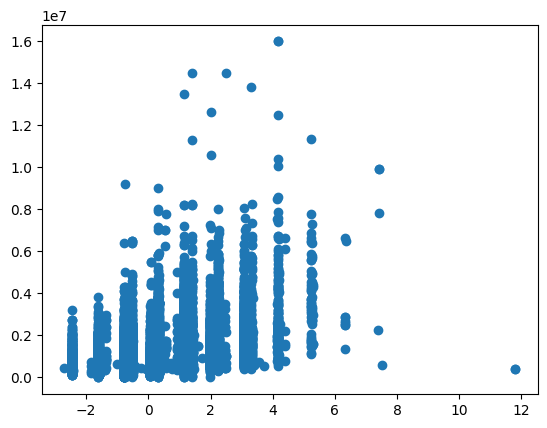

In [10]:
plt.scatter(final_df['pca1'], final_df['price'])

In [11]:
from sklearn.linear_model import LinearRegression

x = final_df[['pca1']]
y = final_df['price']
model = LinearRegression()
model.fit(x, y)

LinearRegression()

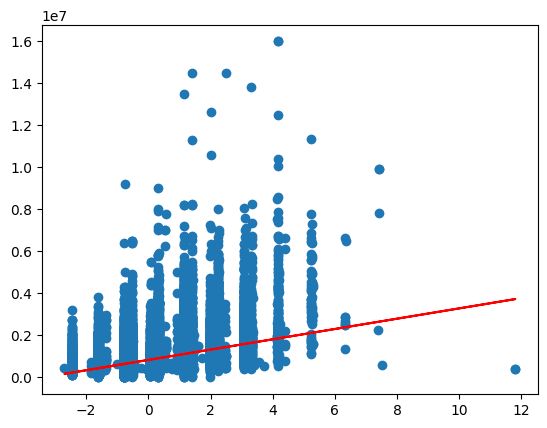

In [12]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')